In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv("/content/drive/MyDrive/polynomial_regression_train.csv")
data

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,1,-0.299150,0.980381,-1.244780,0.420551,-0.352235,8.168743e-10
1,2,-0.374319,-1.179867,0.615588,0.054701,0.687182,-5.081225e-10
2,3,-1.240429,-0.139086,-0.001653,0.487685,-0.242808,4.560170e-10
3,4,-0.429881,-1.724246,-0.098046,0.896504,0.318585,-2.647546e-09
4,5,-1.726345,1.945823,1.275979,-0.474670,1.050494,-1.704606e-08
...,...,...,...,...,...,...,...
47995,47996,1.125337,0.229907,-1.789732,-0.571275,-1.900555,7.752513e-09
47996,47997,1.733309,-0.721866,0.958440,0.317420,0.108628,7.770135e-09
47997,47998,-1.677538,1.758274,1.020534,0.346496,1.313755,-1.096204e-08
47998,47999,1.313345,0.315358,-0.060629,0.703251,-0.618520,1.962097e-09


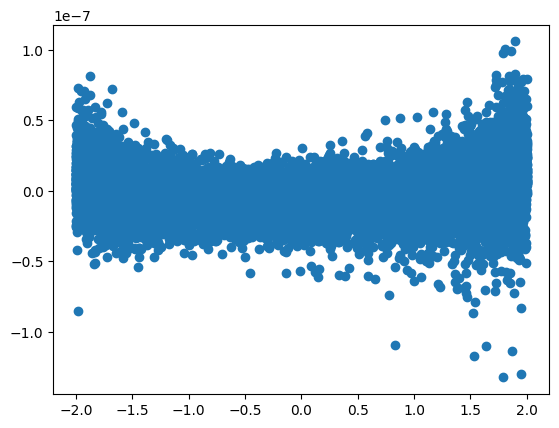

In [3]:
plt.scatter(data.Feature_1,data.Target)

In [4]:
data_arr=np.array(data)
X=data_arr[:,1:-1]
Y=data_arr[:,-1][:,np.newaxis]
X.shape,Y.shape

((48000, 5), (48000, 1))

In [5]:
Y = Y.reshape(-1)
Y.shape

(48000,)

In [6]:
m = X.shape[0]
m

48000

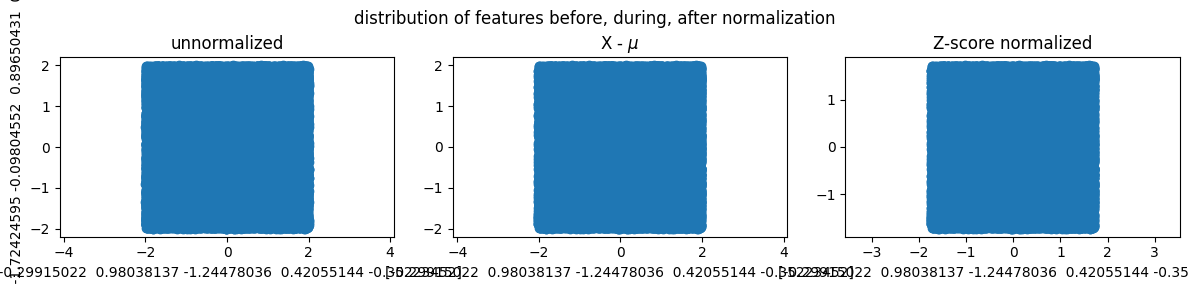

In [7]:
mu     = np.mean(X,axis=0)
sigma  = np.std(X,axis=0)
X_mean = (X - mu)
X_norm = (X - mu)/sigma

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X[:,0], X[:,3])
ax[0].set_xlabel(X[0]); ax[0].set_ylabel(X[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X[0]); ax[0].set_ylabel(X[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X[0]); ax[0].set_ylabel(X[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [8]:
from itertools import combinations_with_replacement

def generate_polynomial_features(X, degree):
    """
    Generate polynomial features up to a given degree.

    Parameters:
    X (numpy array): Input features of shape (m, n), where
                     m = number of examples, n = number of features.
    degree (int): Maximum degree of polynomial terms.

    Returns:
    numpy array: Array of shape (m, number of polynomial terms).
    """
    m, n = X.shape
    poly_features = []  # List to store polynomial features

    for d in range(1, degree + 1):
        # Generate combinations of indices for the current degree
        for comb in combinations_with_replacement(range(n), d):
            # Compute the product of features for this combination
            product = np.prod(X[:, comb], axis=1)
            poly_features.append(product)

    # Stack all polynomial features column-wise
    P = np.column_stack(poly_features)
    mu     = np.mean(P,axis=0)
    sigma  = np.std(P,axis=0)
    P_mean = (P - mu)
    P_norm = (P - mu)/sigma
    return P_norm


In [9]:
def model (x,y,learning_rate,iteration):

  cost_list = []
  global w_init
  b_init=0

  for i in range(iteration):
        # Predict
        y_pred = np.dot(x, w_init) + b_init

        # Calculate cost (Mean Squared Error)
        cost = (1 / (2 * m)) * np.sum(np.square(y_pred - y))
        cost_list.append(cost)

        # Calculate gradients
        d_w = (1 / m) * np.dot(x.T, (y_pred - y))
        d_b = (1 / m) * np.sum((y_pred - y))

        # Update weights and bias
        w_init = w_init - learning_rate * d_w
        b_init = b_init - learning_rate * d_b

        if(i%(iteration/10)==0):
            print("Cost is :", cost)
            print("y_pred is :",y_pred)

  return w_init,b_init,cost_list,y_pred

In [10]:
#Quadratic Polynomial

X2 = generate_polynomial_features(X, 2)
print(X2.shape)
w_init=np.zeros(X2.shape[1])

(48000, 20)


In [11]:
iteration = 1000
learning_rate = 0.1
w_init,b_init,cost_list,y_pred = model(X2,Y,learning_rate= learning_rate,iteration = iteration)



Cost is : 5.709815763232481e-17
y_pred is : [0. 0. 0. ... 0. 0. 0.]
Cost is : 2.9931916282387166e-17
y_pred is : [ 1.81984825e-09 -2.12028914e-09  4.40489692e-09 ... -6.77855103e-09
  3.58377214e-09 -3.14244364e-09]
Cost is : 2.9931916261787296e-17
y_pred is : [ 1.81993166e-09 -2.12042174e-09  4.40501098e-09 ... -6.77880618e-09
  3.58384943e-09 -3.14250977e-09]
Cost is : 2.9931916261787296e-17
y_pred is : [ 1.81993166e-09 -2.12042175e-09  4.40501098e-09 ... -6.77880619e-09
  3.58384943e-09 -3.14250977e-09]
Cost is : 2.9931916261787296e-17
y_pred is : [ 1.81993166e-09 -2.12042175e-09  4.40501098e-09 ... -6.77880619e-09
  3.58384943e-09 -3.14250977e-09]
Cost is : 2.9931916261787296e-17
y_pred is : [ 1.81993166e-09 -2.12042175e-09  4.40501098e-09 ... -6.77880619e-09
  3.58384943e-09 -3.14250977e-09]
Cost is : 2.9931916261787296e-17
y_pred is : [ 1.81993166e-09 -2.12042175e-09  4.40501098e-09 ... -6.77880619e-09
  3.58384943e-09 -3.14250977e-09]
Cost is : 2.9931916261787296e-17
y_pred is :

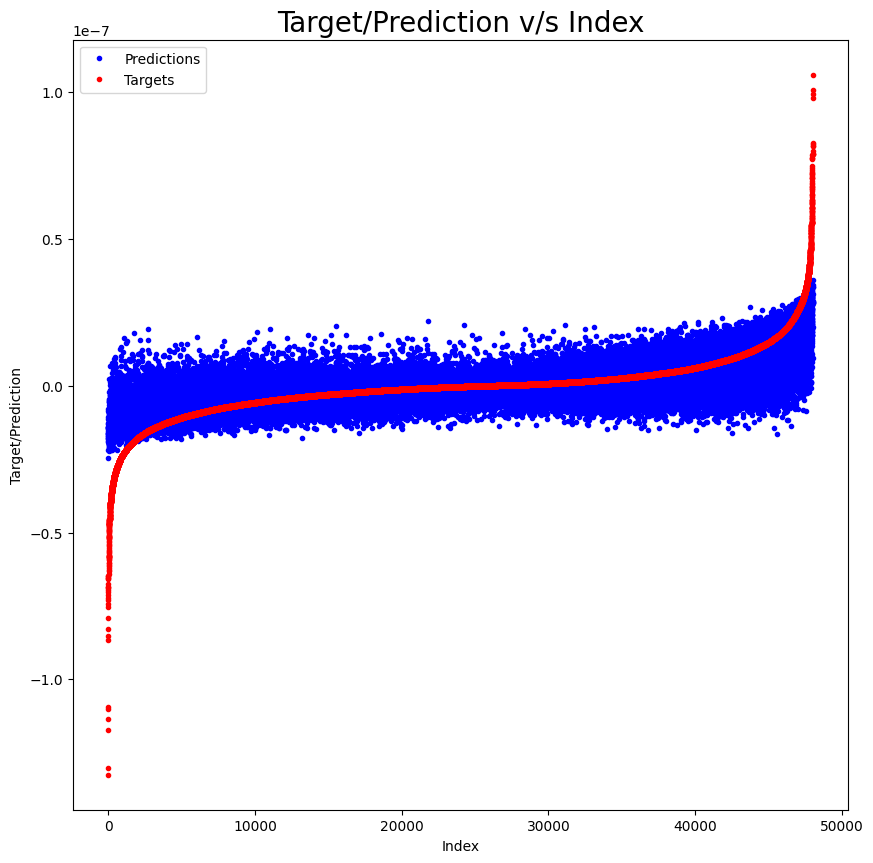

In [12]:
plt.figure(figsize = (10,10), dpi = 100)

plt.title("Target/Prediction v/s Index", fontdict = {'fontsize' : 20})
plt.xlabel("Index")
plt.ylabel("Target/Prediction")

sorted_indices = np.argsort(Y)
ysort = Y[sorted_indices]
yhatsort = y_pred[sorted_indices]

plt.plot(data.iloc[:, 0], yhatsort, '.', color = 'b', label = 'Predictions')
plt.plot(data.iloc[:, 0], ysort, '.', color = 'r', label = 'Targets')

plt.legend()
plt.show()

In [13]:
print('Train Accuracy:', {(1-(np.sum((y_pred-Y)**2)/np.sum((np.mean(Y)-Y)**2))) * 100})      #R_2 score

Train Accuracy: {47.52902147929392}


In [14]:
#Cubic Polynomial

X3 = generate_polynomial_features(X, 3)
print(X3.shape)
w_init=np.zeros(X3.shape[1])

(48000, 55)


In [15]:
iteration = 1000
learning_rate = 0.05
w_init,b_init,cost_list,y_pred = model(X3,Y,learning_rate= learning_rate,iteration = iteration)



Cost is : 5.709815763232481e-17
y_pred is : [0. 0. 0. ... 0. 0. 0.]
Cost is : 2.283487932967694e-17
y_pred is : [ 3.02057962e-09 -2.67145454e-09  4.82960586e-09 ...  4.49354949e-09
  2.57599710e-09  9.94993814e-10]
Cost is : 2.272403339766418e-17
y_pred is : [ 3.43281024e-09 -2.83720446e-09  4.97575886e-09 ...  4.99206627e-09
  2.50182177e-09  1.36438190e-09]
Cost is : 2.2693902531580695e-17
y_pred is : [ 3.67419050e-09 -2.97634429e-09  5.06320974e-09 ...  4.99795319e-09
  2.47912054e-09  1.49373189e-09]
Cost is : 2.2678721332794186e-17
y_pred is : [ 3.83578558e-09 -3.08128502e-09  5.12278125e-09 ...  4.95488055e-09
  2.46992060e-09  1.58151683e-09]
Cost is : 2.2670756523354836e-17
y_pred is : [ 3.94917327e-09 -3.15787444e-09  5.16444767e-09 ...  4.91633914e-09
  2.46495436e-09  1.64707832e-09]
Cost is : 2.2666561405898455e-17
y_pred is : [ 4.03031531e-09 -3.21345964e-09  5.19416603e-09 ...  4.88702374e-09
  2.46180893e-09  1.69555291e-09]
Cost is : 2.2664350625924755e-17
y_pred is : [

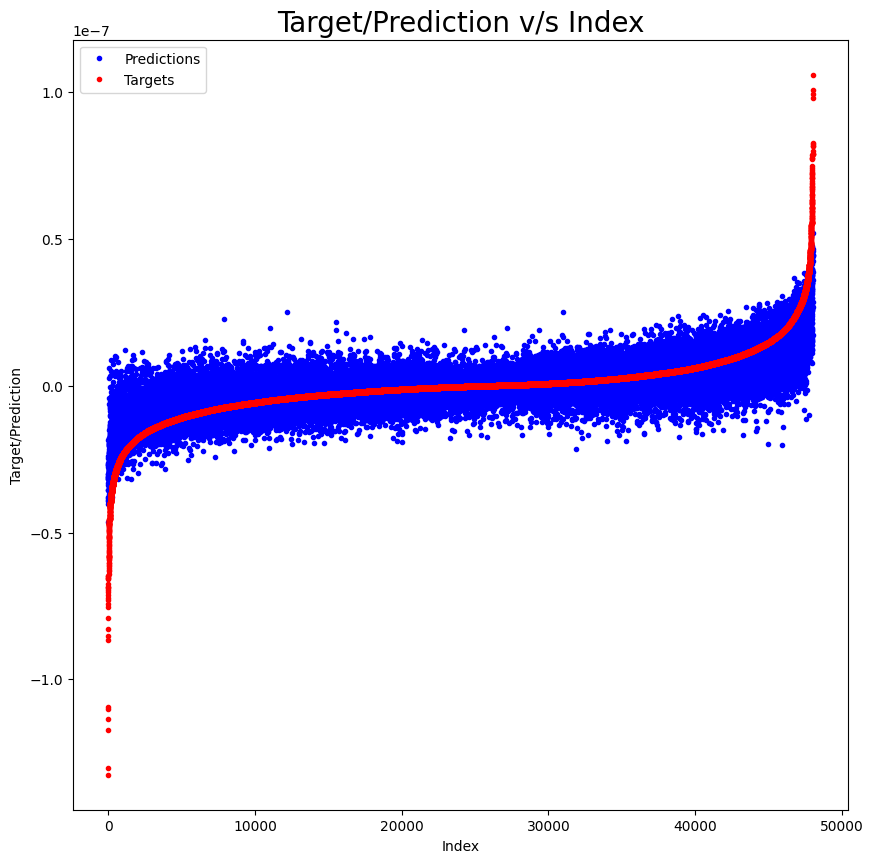

In [16]:
plt.figure(figsize = (10,10), dpi = 100)

plt.title("Target/Prediction v/s Index", fontdict = {'fontsize' : 20})
plt.xlabel("Index")
plt.ylabel("Target/Prediction")

sorted_indices = np.argsort(Y)
ysort = Y[sorted_indices]
yhatsort = y_pred[sorted_indices]

plt.plot(data.iloc[:, 0], yhatsort, '.', color = 'b', label = 'Predictions')
plt.plot(data.iloc[:, 0], ysort, '.', color = 'r', label = 'Targets')

plt.legend()
plt.show()

In [17]:
print('Train Accuracy:', {(1-(np.sum((y_pred-Y)**2)/np.sum((np.mean(Y)-Y)**2))) * 100})      #R_2 score

Train Accuracy: {60.272826524049684}


In [18]:
#Bi-quadratic Polynomial

X4 = generate_polynomial_features(X, 4)
X4
w_init=np.zeros(X4.shape[1])

In [19]:
iteration = 2000
learning_rate = 0.01
w_init,b_init,cost_list,y_pred = model(X4,Y,learning_rate= learning_rate,iteration = iteration)


Cost is : 5.709815763232481e-17
y_pred is : [0. 0. 0. ... 0. 0. 0.]
Cost is : 1.0401156163694659e-17
y_pred is : [ 1.00889898e-09 -1.65839781e-09  2.18640465e-09 ... -1.04300754e-08
  2.17006551e-09  2.44868954e-09]
Cost is : 7.246714939652098e-18
y_pred is : [ 1.18270788e-09 -1.77604014e-09  2.31869880e-09 ... -1.29172678e-08
  2.21655920e-09  3.95521984e-09]
Cost is : 6.1454622625078755e-18
y_pred is : [ 1.27364568e-09 -1.83265324e-09  2.38211181e-09 ... -1.42497180e-08
  2.29885328e-09  4.37969071e-09]
Cost is : 5.6156178470004144e-18
y_pred is : [ 1.30533301e-09 -1.87027907e-09  2.37317805e-09 ... -1.49446797e-08
  2.37309949e-09  4.44843809e-09]
Cost is : 5.299035838020635e-18
y_pred is : [ 1.30385263e-09 -1.89149822e-09  2.31230921e-09 ... -1.53083084e-08
  2.42784623e-09  4.39958912e-09]
Cost is : 5.0835827192857954e-18
y_pred is : [ 1.28486251e-09 -1.89900749e-09  2.21809566e-09 ... -1.54981381e-08
  2.46292510e-09  4.31840812e-09]
Cost is : 4.9252120156479506e-18
y_pred is : [

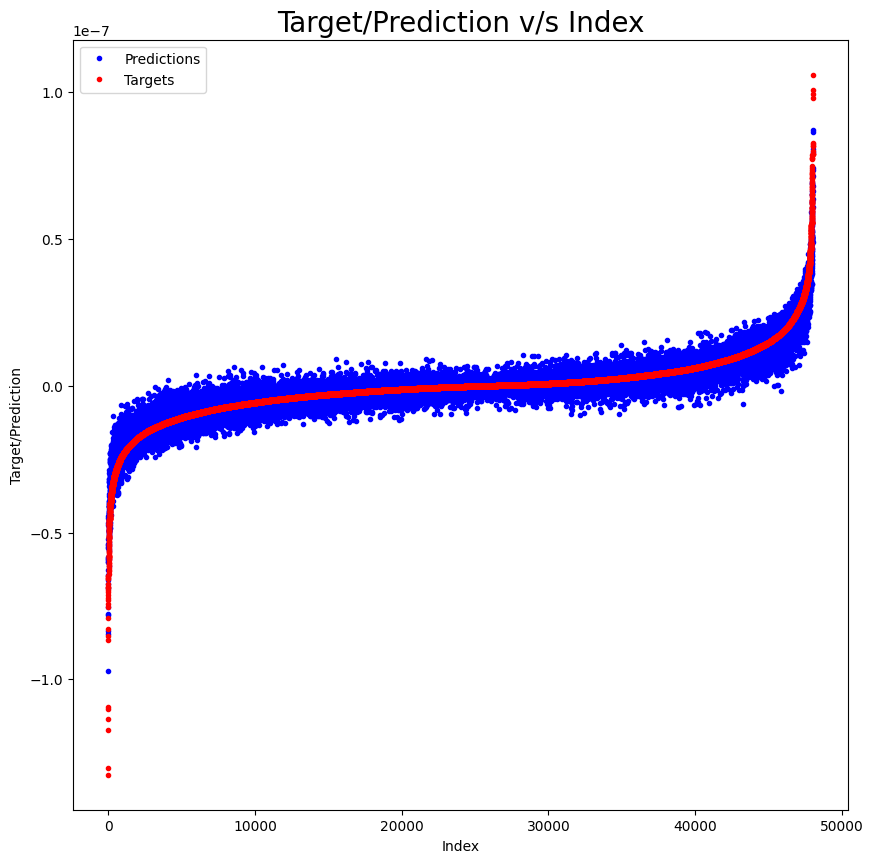

In [20]:
plt.figure(figsize = (10,10), dpi = 100)

plt.title("Target/Prediction v/s Index", fontdict = {'fontsize' : 20})
plt.xlabel("Index")
plt.ylabel("Target/Prediction")

sorted_indices = np.argsort(Y)
ysort = Y[sorted_indices]
yhatsort = y_pred[sorted_indices]

plt.plot(data.iloc[:, 0], yhatsort, '.', color = 'b', label = 'Predictions')
plt.plot(data.iloc[:, 0], ysort, '.', color = 'r', label = 'Targets')

plt.legend()
plt.show()

In [21]:
print('Train Accuracy:', {(1-(np.sum((y_pred-Y)**2)/np.sum((np.mean(Y)-Y)**2))) * 100})      #R_2 score

Train Accuracy: {91.88666638367042}


In [22]:
#Fifth Degree Polynomial

X5 = generate_polynomial_features(X, 5)
X5
w_init=np.zeros(X5.shape[1])

In [23]:
iteration = 2000
learning_rate = 0.005
w_init,b_init,cost_list,y_pred = model(X5,Y,learning_rate= learning_rate,iteration = iteration)

Cost is : 5.709815763232481e-17
y_pred is : [0. 0. 0. ... 0. 0. 0.]
Cost is : 1.1899547917920068e-17
y_pred is : [ 1.45262734e-09 -1.39512469e-09  2.28651370e-09 ... -3.82286083e-09
  1.73941163e-09  2.28019044e-09]
Cost is : 8.510412080476352e-18
y_pred is : [ 1.60010111e-09 -1.60956181e-09  2.45470305e-09 ... -7.55955739e-09
  1.88735128e-09  3.13492652e-09]
Cost is : 6.7659544034172926e-18
y_pred is : [ 1.69409630e-09 -1.72564981e-09  2.54226778e-09 ... -1.01991707e-08
  2.00789841e-09  3.47168557e-09]
Cost is : 5.744045071542602e-18
y_pred is : [ 1.74304742e-09 -1.80063253e-09  2.60025133e-09 ... -1.19483549e-08
  2.12477271e-09  3.58512106e-09]
Cost is : 5.096530375785005e-18
y_pred is : [ 1.75691346e-09 -1.84572202e-09  2.62928411e-09 ... -1.31069412e-08
  2.22717228e-09  3.58737364e-09]
Cost is : 4.658113989305576e-18
y_pred is : [ 1.74563453e-09 -1.86857335e-09  2.63293702e-09 ... -1.38783525e-08
  2.31241121e-09  3.52932142e-09]
Cost is : 4.344014900484568e-18
y_pred is : [ 1.

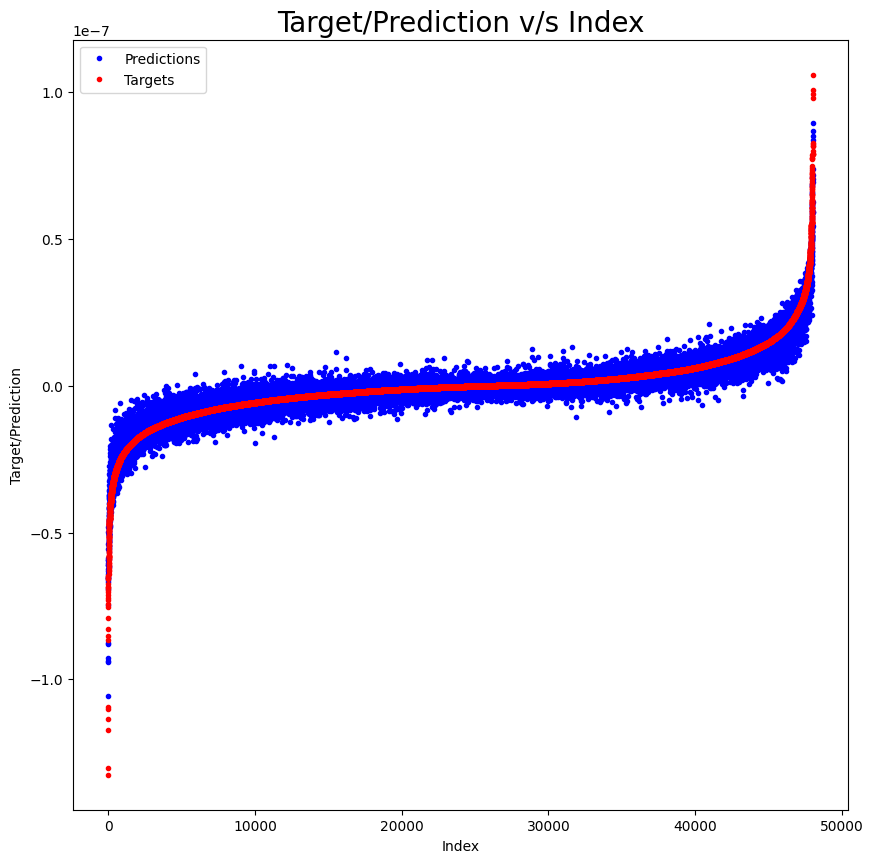

In [24]:
plt.figure(figsize = (10,10), dpi = 100)

plt.title("Target/Prediction v/s Index", fontdict = {'fontsize' : 20})
plt.xlabel("Index")
plt.ylabel("Target/Prediction")

sorted_indices = np.argsort(Y)
ysort = Y[sorted_indices]
yhatsort = y_pred[sorted_indices]

plt.plot(data.iloc[:, 0], yhatsort, '.', color = 'b', label = 'Predictions')
plt.plot(data.iloc[:, 0], ysort, '.', color = 'r', label = 'Targets')

plt.legend()
plt.show()

In [25]:
print('Train Accuracy:', {(1-(np.sum((y_pred-Y)**2)/np.sum((np.mean(Y)-Y)**2))) * 100})      #R_2 score

Train Accuracy: {93.37883695094543}


In [26]:
#Sixth Degree Polynomial

X6 = generate_polynomial_features(X, 6)
X6
w_init=np.zeros(X6.shape[1])

In [27]:
iteration = 3000
learning_rate = 0.1
w_init,b_init,cost_list,y_pred = model(X6,Y,learning_rate= learning_rate,iteration = iteration)


Cost is : 5.709815763232481e-17
y_pred is : [0. 0. 0. ... 0. 0. 0.]
Cost is : 1.4535815749899196e-19
y_pred is : [ 1.13386972e-09 -9.02664895e-10  9.14455761e-10 ... -1.19412552e-08
  2.20970535e-09 -1.75247471e-10]
Cost is : 5.074551906916296e-20
y_pred is : [ 1.02987935e-09 -7.92065298e-10  7.47327292e-10 ... -1.15347049e-08
  2.19006951e-09 -1.35527001e-10]
Cost is : 2.758277619248866e-20
y_pred is : [ 9.60824782e-10 -7.26702847e-10  6.49048435e-10 ... -1.13793146e-08
  2.14575097e-09 -2.19715977e-11]
Cost is : 1.7957308114645668e-20
y_pred is : [ 9.19808102e-10 -6.80795780e-10  5.83827775e-10 ... -1.12839917e-08
  2.10766298e-09  6.22382323e-11]
Cost is : 1.2908438325536497e-20
y_pred is : [ 8.94393473e-10 -6.44910166e-10  5.38335493e-10 ... -1.12158324e-08
  2.07726242e-09  1.19890009e-10]
Cost is : 9.859445818180638e-21
y_pred is : [ 8.78208091e-10 -6.15512085e-10  5.05744651e-10 ... -1.11653965e-08
  2.05268737e-09  1.60520588e-10]
Cost is : 7.84597144422167e-21
y_pred is : [ 8.

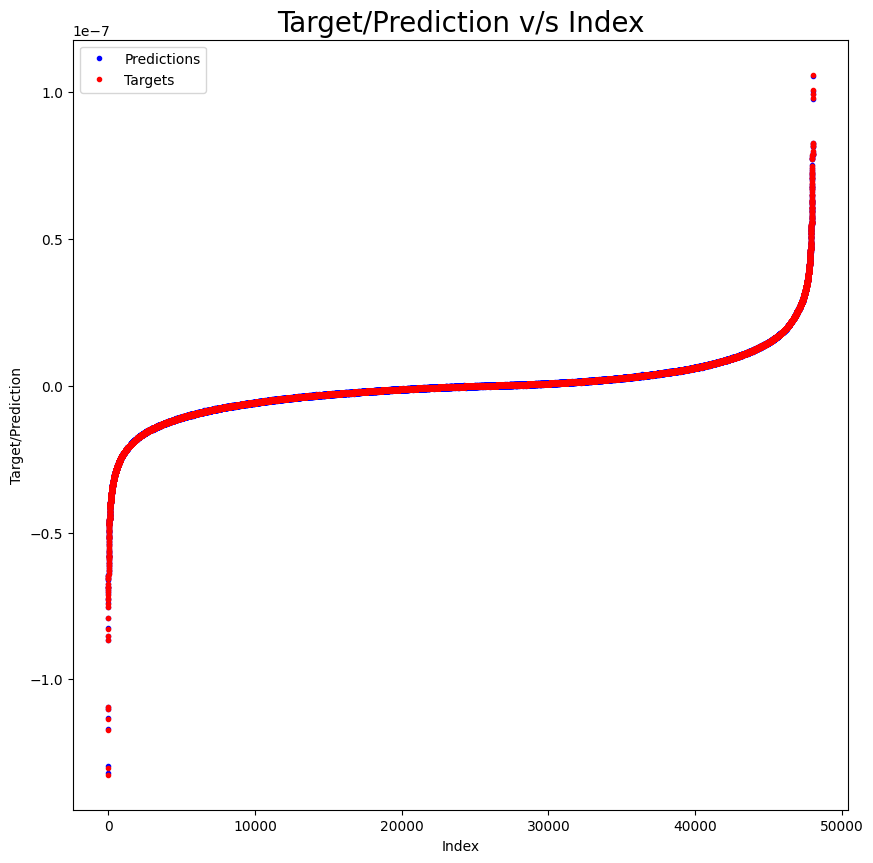

In [28]:
plt.figure(figsize = (10,10), dpi = 100)

plt.title("Target/Prediction v/s Index", fontdict = {'fontsize' : 20})
plt.xlabel("Index")
plt.ylabel("Target/Prediction")

sorted_indices = np.argsort(Y)
ysort = Y[sorted_indices]
yhatsort = y_pred[sorted_indices]

plt.plot(data.iloc[:, 0], yhatsort, '.', color = 'b', label = 'Predictions')
plt.plot(data.iloc[:, 0], ysort, '.', color = 'r', label = 'Targets')

plt.legend()
plt.show()

In [29]:
def plot(cost,i_list):
    plt.plot(i_list,cost,c="r",label="cost")
    plt.xlabel(f"iteration")
    plt.ylabel("cost")
    plt.legend()
    plt.show()

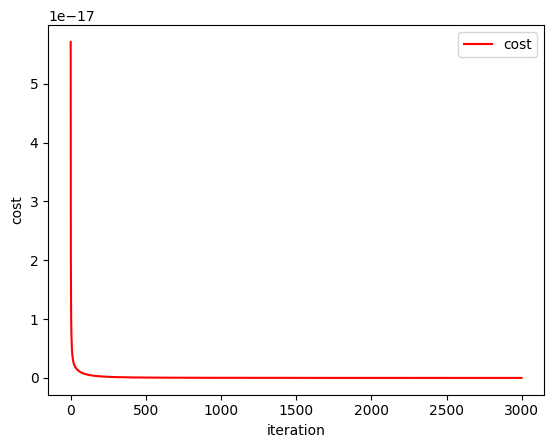

In [30]:
plot(cost_list,np.arange(iteration))

In [31]:
print('Train Accuracy:', {(1-(np.sum((y_pred-Y)**2)/np.sum((np.mean(Y)-Y)**2))) * 100})      #R_2 score

Train Accuracy: {99.9918450443941}


In [32]:
#Seven Degree Polynomial

X7 = generate_polynomial_features(X, 7)
X7
w_init=np.zeros(X7.shape[1])

In [33]:
iteration = 2000
learning_rate = 0.015
w_init,b_init,cost_list,y_pred = model(X7,Y,learning_rate= learning_rate,iteration = iteration)


Cost is : 5.709815763232481e-17
y_pred is : [0. 0. 0. ... 0. 0. 0.]
Cost is : 1.5747163234109888e-18
y_pred is : [ 9.24939311e-10 -1.10534125e-09  1.77218502e-09 ... -1.39579914e-08
  2.11622647e-09  7.43805290e-10]
Cost is : 9.273848624107951e-19
y_pred is : [ 9.01658926e-10 -1.04922019e-09  1.54645168e-09 ... -1.35294517e-08
  2.20286062e-09  1.07474823e-10]
Cost is : 6.394232915744833e-19
y_pred is : [ 8.93236525e-10 -9.82571541e-10  1.33442157e-09 ... -1.31056688e-08
  2.16897194e-09 -1.00737571e-10]
Cost is : 4.74596041218221e-19
y_pred is : [ 9.00348490e-10 -9.35937671e-10  1.19476598e-09 ... -1.28104994e-08
  2.14491268e-09 -1.88651754e-10]
Cost is : 3.6942035533394156e-19
y_pred is : [ 9.13523737e-10 -9.05458832e-10  1.10404047e-09 ... -1.25954183e-08
  2.13646206e-09 -2.30674094e-10]
Cost is : 2.9743786932404607e-19
y_pred is : [ 9.26926268e-10 -8.86082503e-10  1.04265459e-09 ... -1.24309678e-08
  2.13782127e-09 -2.51500620e-10]
Cost is : 2.457446312405655e-19
y_pred is : [ 9.

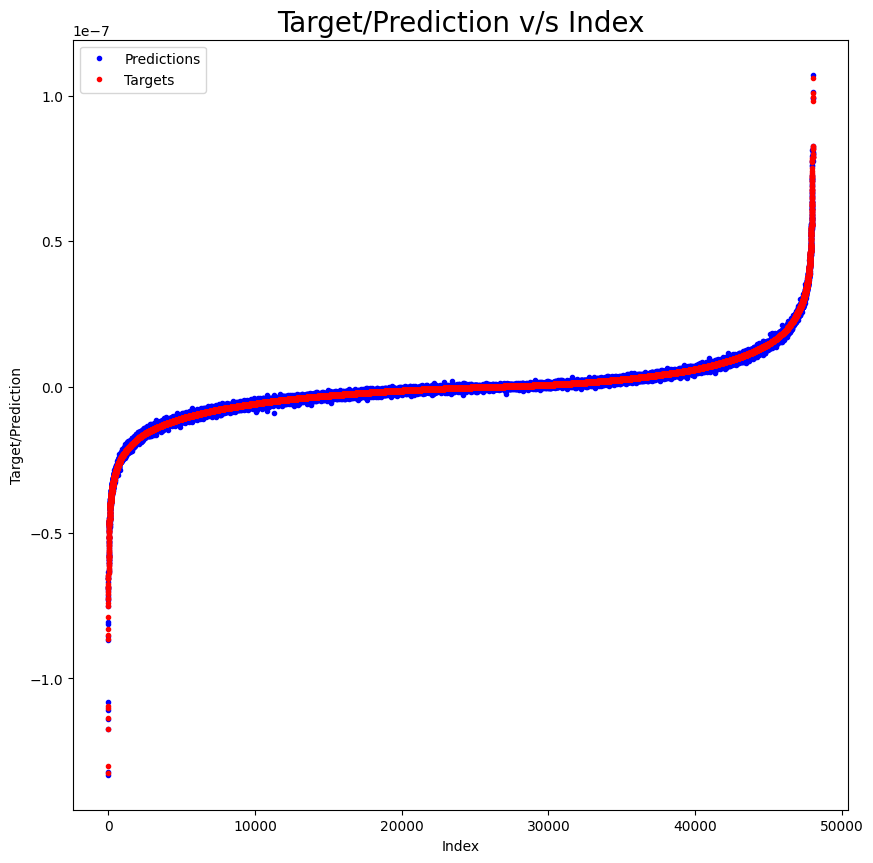

In [34]:
plt.figure(figsize = (10,10), dpi = 100)

plt.title("Target/Prediction v/s Index", fontdict = {'fontsize' : 20})
plt.xlabel("Index")
plt.ylabel("Target/Prediction")

sorted_indices = np.argsort(Y)
ysort = Y[sorted_indices]
yhatsort = y_pred[sorted_indices]

plt.plot(data.iloc[:, 0], yhatsort, '.', color = 'b', label = 'Predictions')
plt.plot(data.iloc[:, 0], ysort, '.', color = 'r', label = 'Targets')

plt.legend()
plt.show()

In [35]:
print('Train Accuracy:', {(1-(np.sum((y_pred-Y)**2)/np.sum((np.mean(Y)-Y)**2))) * 100})      #R_2 score

Train Accuracy: {99.72809670651404}


In [36]:
test = pd.read_csv("/content/drive/MyDrive/polynomial_regression_test.csv")
test

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
0,1,1.718004,-0.201814,0.791965,-0.410485,1.678171
1,2,0.782395,0.897345,-0.059263,-1.725306,-1.363520
2,3,0.619033,0.397670,-0.506356,-0.546682,-1.629186
3,4,1.950046,-1.874789,-0.144491,1.952435,1.908823
4,5,0.097417,0.960511,-1.031956,-1.585839,-1.297509
...,...,...,...,...,...,...
11995,11996,1.264677,-0.975995,-1.522923,-0.894496,1.166645
11996,11997,-1.134109,1.309373,1.057666,-1.103589,0.368445
11997,11998,-1.557074,-1.065746,1.440004,0.392618,-0.867881
11998,11999,-0.750905,0.354496,-0.893223,0.960500,-1.309842
